In [1]:
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


from bandit import EpsilonGreedy, UCB, Softmax, ThompsonSampling

In [2]:
# 実験設定
## 腕の数
K = 50

## 真の報酬期待値
mu = np.random.uniform(0, 1, size=K)

## ラウンド回数
T = 1000

## シミュレーション回数
n_sim = 50

## epsilon
range_epsilon = [0.1, 0.5, 0.9]

## softmax の tau
range_tau = [0.5, 1.0, 1.5]

## TS方策の事前分布 (無情報)
alpha, beta = 1., 1.

In [3]:
reward_results = defaultdict(list)
regret_results = defaultdict(list)
for _ in range(n_sim):
    # Epsilon Greedy
    for epsilon in range_epsilon:
        model = EpsilonGreedy(mu=mu, T=T, epsilon=epsilon)
        cumulative_reward, cumulative_regret = model.run()
        reward_results[f"EpsilonGreedy_{epsilon}"].append(cumulative_reward)
        regret_results[f"EpsilonGreedy_{epsilon}"].append(cumulative_regret)
    
    # UCB
    model = UCB(mu=mu, T=T)
    cumulative_reward, cumulative_regret = model.run()
    reward_results["UCB"].append(cumulative_reward)
    regret_results["UCB"].append(cumulative_regret)
    
    # Softmax
    for tau in range_tau:
        model = Softmax(mu=mu, T=T, tau=tau)
        cumulative_reward, cumulative_regret = model.run()
        reward_results[f"Softmax_{tau}"].append(cumulative_reward)
        regret_results[f"Softmax_{tau}"].append(cumulative_regret)
        
    
    # ThompsonSampling
    model = ThompsonSampling(mu=mu, T=T, alpha=alpha, beta=beta)
    cumulative_reward, cumulative_regret = model.run()
    reward_results["ThmpsonSampling"].append(cumulative_reward)
    regret_results["ThmpsonSampling"].append(cumulative_regret)

mean_reward = {}
for policy_name, cumulative_rewards in reward_results.items():
    mean_reward[policy_name] = np.array(cumulative_rewards).mean(0)

mean_regret = {}
for policy_name, cumulative_regrets in regret_results.items():
    mean_regret[policy_name] = np.array(cumulative_regrets).mean(0)

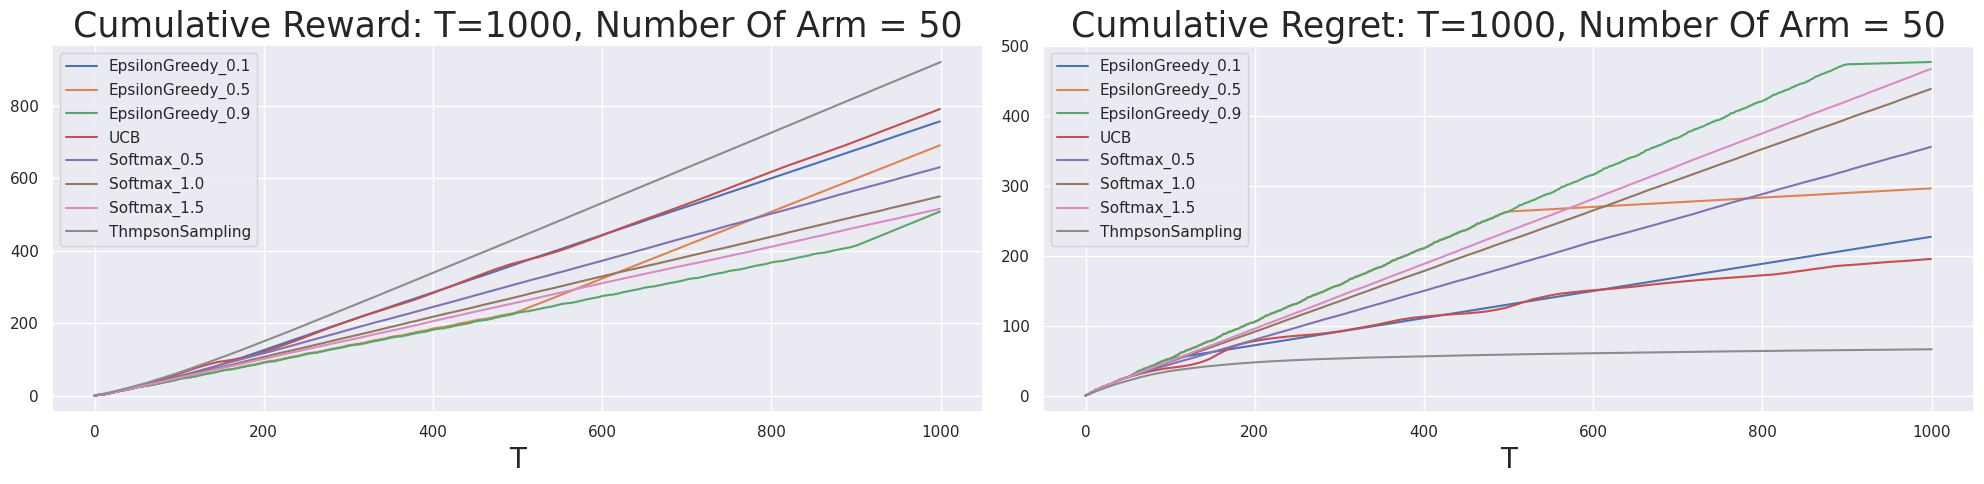

In [4]:
# plot
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.title(f'Cumulative Reward: T={T}, Number Of Arm = {len(mu)}', fontsize=25)
for policy_name, cumulative_reward in mean_reward.items():
    plt.plot(cumulative_reward, label=policy_name)

plt.xlabel('T', fontsize=20)
plt.legend()
plt.tight_layout()
    
plt.subplot(1, 2, 2)
plt.title(f'Cumulative Regret: T={T}, Number Of Arm = {len(mu)}', fontsize=25)
for policy_name, cumulative_regret in mean_regret.items():
    plt.plot(cumulative_regret, label=policy_name)

plt.xlabel('T', fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()